In [46]:
import opendatasets as od
import os
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
import seaborn as sns

# Download dataset

In [ ]:
od.download("https://www.kaggle.com/datasets/naserabdullahalam/phishing-email-dataset")

In [48]:
# List files inside data folder
target_dir = '.\phishing-email-dataset'
os.listdir(target_dir)

['CEAS_08.csv',
 'Enron.csv',
 'Ling.csv',
 'Nazario.csv',
 'Nigerian_Fraud.csv',
 'phishing_email.csv',
 'SpamAssasin.csv']

In [49]:
# load csv file into pandas DataFrame
target_file = os.path.join(target_dir,os.listdir(target_dir)[5])
phishing_email_df = pd.read_csv(target_file)

# Getting one with the data

In [50]:
# Visualize some dataframe information
phishing_email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [51]:
# Visualize first five samples
phishing_email_df.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [52]:
# Visualize last five samples
phishing_email_df.tail()

,text_combined,label
82481,info advantageapartmentscom infoadvantageapart...,1
82482,monkeyorg helpdeskmonkeyorg monkeyorg hi josep...,1
82483,help center infohelpcentercoza_infohelpcenterc...,1
82484,metamask infosofamekarcom verify metamask wall...,1
82485,fastway infofastwaycoza_infofastwaycoza_infofa...,1


In [53]:
# Reading through dataset documentation we now that we have 42,891 spam emails , so we can assume that the value 1 is spam in categorical form

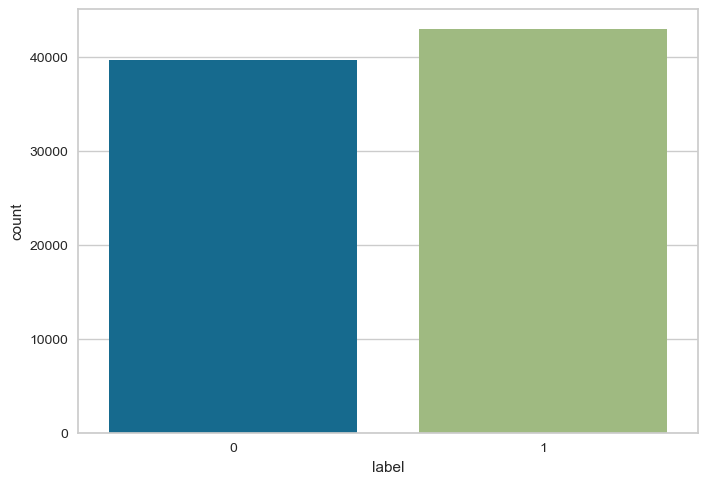

In [54]:
# Visualize class balance
sns.countplot(x=phishing_email_df.label);

In [55]:
# Let's visualize some random samples
random_index = random.randint(0,len(phishing_email_df)-2)
for row in phishing_email_df[['text_combined','label']][random_index:random_index+2].itertuples():
    _,text,label = row
    print(f"Label:{label}","(Spam email)" if label==1 else "(Legitimate email)")
    print(f"Text:{text}\n")

Label:1 (Spam email)
Text:mail report ordersvoyageairguitarcom r2064o60nced1t0ds5510b37002 cd81cd0y3a1aa8v84 josemonkeyorg 10b37hc0m4br30d1t0ds55g0dra1v68n0a002 0cd906fcf4g00u3550aenf6v84w83w3eaenf6b16y31259301vf4f3e510b37ab3bk62002 y82g9co60f3e7edo7fu28a8v84u3550aenf610b37002 sb0w28oc0m3b le8a0f1an0do5cvde94k64m886f002a8v8410b3706abncee70c6e93n2dsd73b002 81ff4e39a8e36r3089q6866t4a002pb9qfbd9cc002 删除你从黑名单帐户 重要提示您的 josemonkeyorg 帐户检测到黑名单服务器上 而这将导致最电子邮件的垃圾邮件或失败输送直至该帐户被阻止 如果你想继续使用您的电子邮件帐户 现在激活 注意不作回应此消息您的帐户将被从数据库中受阻 要更改您收到安全警告点击这里 fri 29 jul 2016 190723 0200 warning josemonkeyorg mailbox blacklisted

Label:1 (Spam email)
Text:host manager teststliningcom server message dear josemonkeyorg received 14 unread messages create space mailbox receive pending messages mailbox database full view 14 unread inbox messages however create space mailbox email data lost permanently regards email administrator message autogenerated email security server replies sent email delivered email meant josemonkey

# Preprocessing data

In [56]:
# Splitting data into training and test sets
train_emails, test_emails, train_labels, test_labels = train_test_split(phishing_email_df.text_combined.to_numpy(),
                                                                        phishing_email_df.label.to_numpy(),
                                                                        test_size=0.2,shuffle=True,
                                                                        stratify=phishing_email_df.label.to_numpy())

In [57]:
#Visualize our train data shapes
train_emails.shape, train_labels.shape

((65988,), (65988,))

In [58]:
#Visualize our test data shapes 
test_emails.shape, test_labels.shape

((16498,), (16498,))

### Converting text into numbers

In [59]:
# Create a tokenization and moddeling pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [60]:
# Fit the pipeline to the training data
model.fit(train_emails, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [61]:
# Evaluate the model on test data
model_score = model.score(test_emails, test_labels)
print(f'The model achieves an accuracy of:{model_score*100:.2f}%')

The model achieves an accuracy of:97.75%


In [62]:
#Making prediction with the model
pred_labels = model.predict(test_emails)

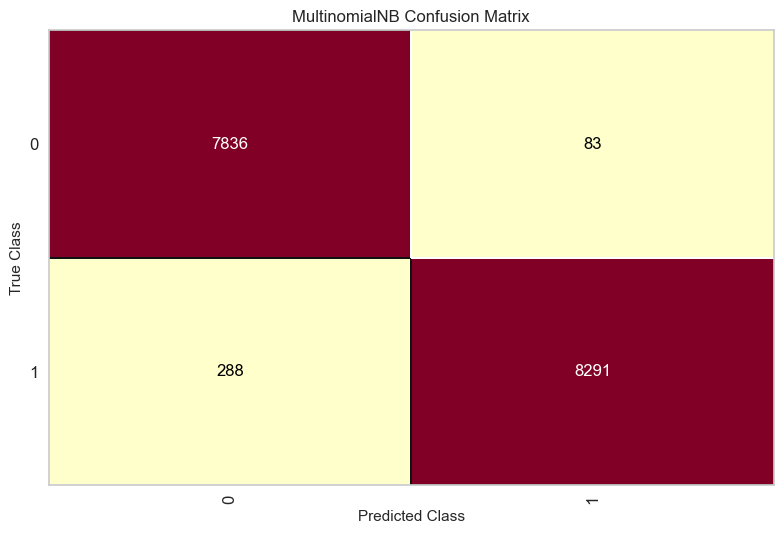

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7919
           1       0.99      0.97      0.98      8579

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498



In [63]:
# Visualize a ConfusionMatrix and classification report
cm = ConfusionMatrix(model)
cm.fit(train_emails, train_labels)
cm.score(test_emails, test_labels)
cm.show();
print(classification_report(test_labels, pred_labels))